# (a) (15 分) Investigate the dataset by some appropriate explorative data analysis. Are math, reading, and writing scores correlated with each other?

In [157]:
import pandas as pd
import numpy as np

In [158]:
stud_data=pd.read_csv("StudentsPerformance.csv")
stud_data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [159]:
print('math平均:',stud_data['math score'].mean())
print('reading平均:',stud_data['reading score'].mean())
print('writing平均:',stud_data['writing score'].mean())


math平均: 66.089
reading平均: 69.169
writing平均: 68.054


In [160]:
stud_data.groupby(['parental level of education']).mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [162]:
stud_data.groupby(['parental level of education','test preparation course']).mean()

math score  ...  writing score
parental level of education test preparation course              ...               
associate's degree          completed                 71.829268  ...      76.817073
                            none                      65.571429  ...      65.842857
bachelor's degree           completed                 73.282609  ...      78.695652
                            none                      66.902778  ...      69.986111
high school                 completed                 65.000000  ...      68.053571
                            none                      60.992857  ...      60.207143
master's degree             completed                 70.600000  ...      80.100000
                            none                      69.307692  ...      73.410256
some college                completed                 71.454545  ...      76.519481
                            none                      64.892617  ...      64.872483
some high school            completed                 66.701299  ...      70.363636
                            none                      61.078431  ...      60.754902

[12 rows x 3 columns]

In [163]:
stud_data.groupby(['race/ethnicity','test preparation course']).mean()

math score  ...  writing score
race/ethnicity test preparation course              ...               
group A        completed                 68.258065  ...      70.903226
               none                      58.086207  ...      58.275862
group B        completed                 67.191176  ...      71.882353
               none                      61.368852  ...      62.098361
group C        completed                 67.495726  ...      74.452991
               none                      62.707921  ...      63.990099
group D        completed                 69.792683  ...      76.658537
               none                      66.255556  ...      67.177778
group E        completed                 77.433333  ...      75.983333
               none                      71.112500  ...      67.975000

[10 rows x 3 columns]

In [164]:
stud_data.groupby(['lunch','test preparation course']).mean()


math score  reading score  writing score
lunch        test preparation course                                          
free/reduced completed                 63.045802      69.870229      70.351145
             none                      56.508929      61.602679      58.736607
standard     completed                 73.533040      76.215859      76.766520
             none                      68.133971      69.177033      67.595694

In [165]:
stud_data.groupby(['gender','test preparation course']).mean()


math score  reading score  writing score
gender test preparation course                                          
female completed                 67.195652      77.375000      78.793478
       none                      61.670659      69.982036      68.982036
male   completed                 72.339080      70.212644      69.793103
       none                      66.688312      62.795455      59.649351

In [166]:
stud_data.groupby(['gender','race/ethnicity','parental level of education','lunch','test preparation course']).mean()


math score  ...  writing score
gender race/ethnicity parental level of education lunch        test preparation course              ...               
female group A        associate's degree          free/reduced none                      47.666667  ...      60.000000
                                                  standard     completed                 60.000000  ...      68.000000
                                                               none                      82.000000  ...      93.000000
                      bachelor's degree           standard     none                      51.666667  ...      61.666667
                      high school                 free/reduced completed                 54.666667  ...      62.000000
...                                                                                            ...  ...            ...
male   group E        some college                standard     completed                 87.250000  ...      74.500000
                                                               none                      73.750000  ...      63.333333
                      some high school            free/reduced completed                 75.500000  ...      69.500000
                                                  standard     completed                 79.333333  ...      70.500000
                                                               none                      74.500000  ...      59.750000

[211 rows x 3 columns]

#  (15 分) Develop a regression model to predict their math, reading, and writing scores by the other variables. Evaluate your regression model by 10-fold crossvalidation. Notice that most of the predictors are categorical.


In [143]:
# !pip install sklearn
from IPython.display import clear_output
import pandas as pd
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
# from sklearn.model_selection import cross_validate
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder

2.4.0


In [144]:
stud_data=pd.read_csv("StudentsPerformance.csv")
stud_data.head()
labelencoder = LabelEncoder()
stud_data['gender'] = labelencoder.fit_transform(stud_data['gender'])
stud_data['race/ethnicity'] = labelencoder.fit_transform(stud_data['race/ethnicity'])
stud_data['parental level of education'] = labelencoder.fit_transform(stud_data['parental level of education'])
stud_data['lunch'] = labelencoder.fit_transform(stud_data['lunch'])
stud_data['test preparation course'] = labelencoder.fit_transform(stud_data['test preparation course'])
stud_data.head()
'''
female=0
male=1

group B=1
group C=2
group A=2

bachelor's degree=1
some college=4
master's degree=3
associate's degree=0
high school=2

standard=1
free/reduced=0

none=1
completed=0
'''

"\nfemale=0\nmale=1\n\ngroup B=1\ngroup C=2\ngroup A=2\n\nbachelor's degree=1\nsome college=4\nmaster's degree=3\nassociate's degree=0\nhigh school=2\n\nstandard=1\nfree/reduced=0\n\nnone=1\ncompleted=0\n"

In [145]:
x=stud_data['math score'].to_numpy()
y=stud_data['reading score'].to_numpy()
z=stud_data['writing score'].to_numpy()
data_x=stud_data.drop(columns=['math score','reading score','writing score']).to_numpy()
data_y=np.array([x,y,z]).T
len(data_x)
# data_y

1000

In [146]:
#define model
x = keras.Input(shape=(5,))
h1 = layers.Dense(64, activation='relu')(x)
h2 = layers.Dense(64, activation='relu')(h1)
h3 = layers.Dense(32, activation='relu')(h2)
outputs = layers.Dense(3)(h3)
nn_model = keras.Model(inputs=x, outputs=outputs,name='nn_network')
nn_model.summary()
nn_model.compile(optimizer='adam',loss="huber",metrics=['mse','mae'])

Model: "nn_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 5)]               0         
_________________________________________________________________
dense_48 (Dense)             (None, 64)                384       
_________________________________________________________________
dense_49 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_50 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_51 (Dense)             (None, 3)                 99        
Total params: 6,723
Trainable params: 6,723
Non-trainable params: 0
_________________________________________________________________


In [147]:
kf=KFold(n_splits=10,shuffle=True)
loss_sum=0
mse_sum=0
mae_sum=0
res=[]
for train_index,test_index in kf.split(data_x):
    x_train,x_test=data_x[train_index],data_x[test_index]
    y_train,y_test=data_y[train_index],data_y[test_index]
    history = nn_model.fit(x_train,y_train,
              batch_size=200, epochs=100, verbose=0,validation_data=(x_test,y_test))
    lo,mse,mae=nn_model.evaluate(x_test,y_test)
    loss_sum+=lo
    mse_sum+=mse
    mae_sum+=mae
    res.append(history)


4/4 [==============================] - 0s 3ms/step - loss: 10.3433 - mse: 184.9361 - mae: 10.8347


In [148]:
print(loss_sum/10,mse_sum/10,mae_sum/10)

10.102465724945068 176.69586791992188 10.591700077056885


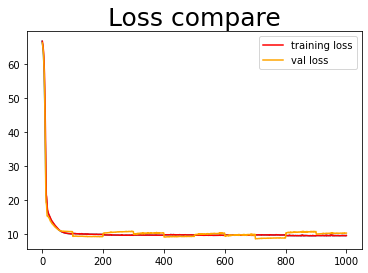

In [149]:
loss_pic=np.array([])
mae_pic=np.array([])
mse_pic=np.array([])
val_pic=np.array([])
plt.title("Loss compare",fontsize=25,)
for i in res:
    loss_pic=np.append(loss_pic,np.array(i.history['loss']))
plt.plot(loss_pic)
for i in res:
    val_pic=np.append(val_pic,np.array(i.history['val_loss']))
ep=range(1,len(loss_pic)+1)
plt.plot(ep,loss_pic,"red",label="training loss")
plt.plot(ep,val_pic,"orange",label="val loss")
plt.legend()
plt.show()

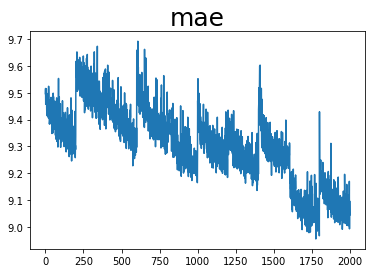

In [150]:
plt.title("mae",fontsize=25,)
for i in tmp:
    mae_pic=np.append(mae_pic,np.array(i.history['mae']))
plt.plot(mae_pic)

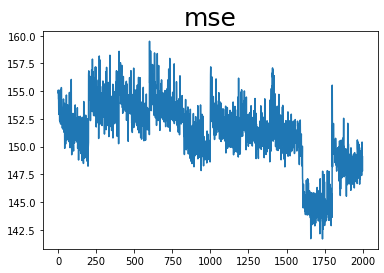

In [151]:
plt.title("mse",fontsize=25,)
for i in tmp:
    mse_pic=np.append(mse_pic,np.array(i.history['mse']))
plt.plot(mse_pic)

# Does your model underfit or overfit? Explain why.


oerfit,看loss compare那張圖

因為驗證時的loss跟訓練時的loss 幾乎是黏在一起
